<a href="https://colab.research.google.com/github/iamatul1214/LLMs/blob/main/Self_attention_psuedo_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Scenario A: IDENTICAL head initializations ===
Head1 weights:
 [[0.12  0.273 0.315 0.292]
 [0.003 0.218 0.466 0.312]
 [0.001 0.204 0.486 0.308]
 [0.002 0.212 0.476 0.31 ]]
Head2 weights:
 [[0.12  0.273 0.315 0.292]
 [0.003 0.218 0.466 0.312]
 [0.001 0.204 0.486 0.308]
 [0.002 0.212 0.476 0.31 ]]


'Scenario A - Head1 attention weights'

,The,black,cat,sat
The,0.120,0.273,0.315,0.292
black,0.003,0.218,0.466,0.312
cat,0.001,0.204,0.486,0.308
sat,0.002,0.212,0.476,0.310


'Scenario A - Head2 attention weights'

,The,black,cat,sat
The,0.120,0.273,0.315,0.292
black,0.003,0.218,0.466,0.312
cat,0.001,0.204,0.486,0.308
sat,0.002,0.212,0.476,0.310



=== Scenario B: SLIGHTLY DIFFERENT initializations ===
Head1 weights:
 [[0.12  0.273 0.315 0.292]
 [0.003 0.218 0.466 0.312]
 [0.001 0.204 0.486 0.308]
 [0.002 0.212 0.476 0.31 ]]
Head2 weights:
 [[0.175 0.255 0.285 0.285]
 [0.03  0.214 0.377 0.379]
 [0.023 0.205 0.385 0.387]
 [0.024 0.206 0.382 0.388]]


'Scenario B - Head1 attention weights'

,The,black,cat,sat
The,0.120,0.273,0.315,0.292
black,0.003,0.218,0.466,0.312
cat,0.001,0.204,0.486,0.308
sat,0.002,0.212,0.476,0.310


'Scenario B - Head2 attention weights'

,The,black,cat,sat
The,0.175,0.255,0.285,0.285
black,0.030,0.214,0.377,0.379
cat,0.023,0.205,0.385,0.387
sat,0.024,0.206,0.382,0.388


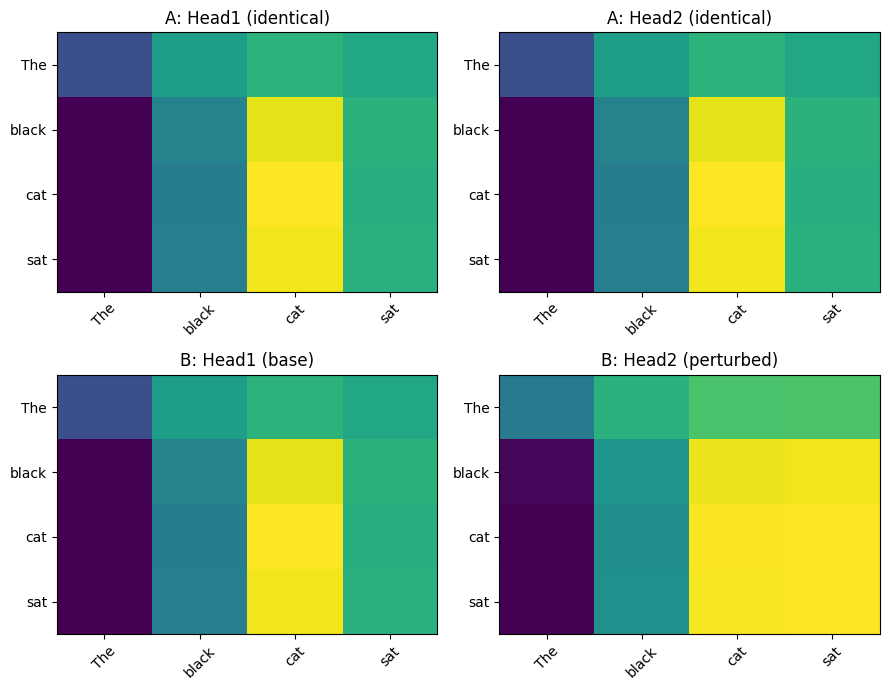


Numeric comparison (max absolute diff between heads):
Scenario A (identical): max abs diff = 0.000000
Scenario B (slightly different): max abs diff = 0.101741


In [4]:
# demonstration: two heads with IDENTICAL vs SLIGHTLY DIFFERENT initialization
# We'll compute attention weights on the same sentence and show numeric heatmaps & tables.
#
# Sentence: ["The", "black", "cat", "sat"]
# Embeddings: small handcrafted vectors
# Two scenarios:
#  A) head1 and head2 have IDENTICAL W matrices
#  B) head1 and head2 have SLIGHTLY DIFFERENT W matrices (small random noise)
#
# We'll print and display attention weight matrices for both heads in both scenarios,
# and plot heatmaps for visual comparison.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

np.set_printoptions(precision=3, suppress=True)

tokens = ["The", "black", "cat", "sat"]

# simple 4-D embeddings
embeddings = np.array([
    [0.1, 0.2, 0.1, 0.0],  # The
    [0.7, 0.6, 0.8, 0.1],  # black
    [0.8, 0.7, 0.9, 0.0],  # cat
    [0.75,0.9, 0.6, 0.1]   # sat
])

d_model = embeddings.shape[1]
d_head = 2

def softmax_rows(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / e_x.sum(axis=1, keepdims=True)

# Base projection matrices (head A)
WQ_base = np.array([[1.0, 0.8],
                    [1.0, 0.9],
                    [1.1, 0.85],
                    [0.0, 0.0]])
WK_base = WQ_base * 0.95
WV_base = np.array([[1.0, 0.9],
                    [1.0, 0.9],
                    [1.0, 0.9],
                    [0.0, 0.0]])

def compute_attention(WQ, WK, WV):
    Q = embeddings @ WQ
    K = embeddings @ WK
    V = embeddings @ WV
    scores = Q @ K.T
    scores_scaled = scores / sqrt(d_head)
    weights = softmax_rows(scores_scaled)
    output = weights @ V                  # @ means matrix multiplication
    return dict(Q=Q, K=K, V=V, scores=scores, scores_scaled=scores_scaled, weights=weights, output=output)

# Scenario A: identical heads
WQ1_A = WQ_base.copy()
WK1_A = WK_base.copy()
WV1_A = WV_base.copy()

WQ2_A = WQ_base.copy()  # identical
WK2_A = WK_base.copy()
WV2_A = WV_base.copy()

res_A_head1 = compute_attention(WQ1_A, WK1_A, WV1_A)
res_A_head2 = compute_attention(WQ2_A, WK2_A, WV2_A)

# Scenario B: slightly different (small random noise)
rng = np.random.default_rng(0)
noise_scale = 0.5
WQ1_B = WQ_base.copy()
WK1_B = WK_base.copy()
WV1_B = WV_base.copy()

WQ2_B = WQ_base + rng.normal(scale=noise_scale, size=WQ_base.shape)
WK2_B = WK_base + rng.normal(scale=noise_scale, size=WK_base.shape)
WV2_B = WV_base + rng.normal(scale=noise_scale, size=WV_base.shape)

res_B_head1 = compute_attention(WQ1_B, WK1_B, WV1_B)
res_B_head2 = compute_attention(WQ2_B, WK2_B, WV2_B)

# Display results
print("=== Scenario A: IDENTICAL head initializations ===")
print("Head1 weights:\n", np.round(res_A_head1['weights'],3))
print("Head2 weights:\n", np.round(res_A_head2['weights'],3))
display("Scenario A - Head1 attention weights", pd.DataFrame(np.round(res_A_head1['weights'],3), index=tokens, columns=tokens))
display("Scenario A - Head2 attention weights", pd.DataFrame(np.round(res_A_head2['weights'],3), index=tokens, columns=tokens))

print("\n=== Scenario B: SLIGHTLY DIFFERENT initializations ===")
print("Head1 weights:\n", np.round(res_B_head1['weights'],3))
print("Head2 weights:\n", np.round(res_B_head2['weights'],3))
display("Scenario B - Head1 attention weights", pd.DataFrame(np.round(res_B_head1['weights'],3), index=tokens, columns=tokens))
display("Scenario B - Head2 attention weights", pd.DataFrame(np.round(res_B_head2['weights'],3), index=tokens, columns=tokens))

# Plot heatmaps side-by-side for visual comparison
fig, axes = plt.subplots(2, 2, figsize=(9,7))
ims = []
axes[0,0].imshow(res_A_head1['weights'], aspect='auto')
axes[0,0].set_title("A: Head1 (identical)")
axes[0,0].set_xticks(range(len(tokens))); axes[0,0].set_xticklabels(tokens, rotation=45)
axes[0,0].set_yticks(range(len(tokens))); axes[0,0].set_yticklabels(tokens)

axes[0,1].imshow(res_A_head2['weights'], aspect='auto')
axes[0,1].set_title("A: Head2 (identical)")
axes[0,1].set_xticks(range(len(tokens))); axes[0,1].set_xticklabels(tokens, rotation=45)
axes[0,1].set_yticks(range(len(tokens))); axes[0,1].set_yticklabels(tokens)

axes[1,0].imshow(res_B_head1['weights'], aspect='auto')
axes[1,0].set_title("B: Head1 (base)")
axes[1,0].set_xticks(range(len(tokens))); axes[1,0].set_xticklabels(tokens, rotation=45)
axes[1,0].set_yticks(range(len(tokens))); axes[1,0].set_yticklabels(tokens)

axes[1,1].imshow(res_B_head2['weights'], aspect='auto')
axes[1,1].set_title("B: Head2 (perturbed)")
axes[1,1].set_xticks(range(len(tokens))); axes[1,1].set_xticklabels(tokens, rotation=45)
axes[1,1].set_yticks(range(len(tokens))); axes[1,1].set_yticklabels(tokens)

plt.tight_layout()
plt.show()

# Print a short numeric comparison
print("\nNumeric comparison (max absolute diff between heads):")
diff_A = np.max(np.abs(res_A_head1['weights'] - res_A_head2['weights']))
diff_B = np.max(np.abs(res_B_head1['weights'] - res_B_head2['weights']))
print(f"Scenario A (identical): max abs diff = {diff_A:.6f}")
print(f"Scenario B (slightly different): max abs diff = {diff_B:.6f}")
